In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

<div dir='rtl'>
*
۱
داده‌های یک نیروگاه تولید برق در بازه 6 ساله در قالب داده‌های آموزش و آزمایش در فایل‌های hw10_train.csv و hw10_test.csv ذخیره شده است. این فایل‌ها در گوگل درایو درس در پوشه S10 موجود است. داده‌ها مربوط به زمانی است که نیروگاه برای کار با حداکثر ظرفیت تنظیم شده است. 

هدف پیش‌بینی انرژی الکتریکی خالص ساعتی (PE) بر حسب مگاوات ساعت است. برای این منظور متوسط ساعتی دمای محیط (AT) بر حسب سانتی‌گراد، فشار محیط (AP) بر حسب سانتی‌متر جیوه، رطوبت نسبی (RH) بر حسب درصد و فشار گاز خروجی از توربین (V) بر حسب سانتی‌متر جیوه بعنوان متغیرهای پیش‌بینی‌کننده در نظر گرفته شده‌اند.

ابتدا تحلیل اکتشافی روی داده‌های آموزش انجام دهید. کدام گزینه درست است؟
۱

برخی متغیرهای این مسئله از نوع رسته‌ای هستند.
۲

میانگین متغیر پاسخ 468 است.
۳

متغیر رطوبت نسبی چولگی به راست دارد.
۴

ضریب همبستگی پیرسون بین متغیر پاسخ و دمای محیط 95- درصد است.
</div>

In [24]:
data = pd.read_csv('hw10_train.csv')

In [25]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [26]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6500 non-null   float64
 1   V       6500 non-null   float64
 2   AP      6500 non-null   float64
 3   RH      6500 non-null   float64
 4   PE      6500 non-null   float64
dtypes: float64(5)
memory usage: 254.0 KB


### نتیجه اینکه هیچ یک رسته ای نیستند

In [27]:
data.describe()

,AT,V,AP,RH,PE
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,19.638137,54.283428,1013.298531,73.289809,454.372142
std,7.425228,12.665468,5.934595,14.594685,17.025481
min,2.580000,25.360000,993.310000,25.890000,421.570000
25%,13.507500,41.740000,1009.220000,63.357500,439.860000
50%,20.410000,52.300000,1013.005000,75.010000,451.390000
75%,25.670000,66.490000,1017.240000,84.830000,468.507500
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### میانگین متغیر پاسخ 454.37 است

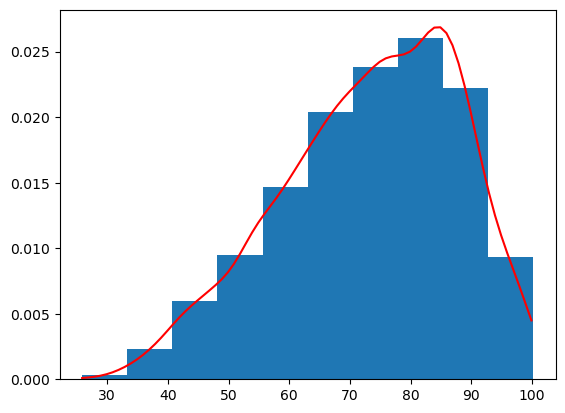

In [32]:
from scipy import stats
xp= np.arange(data['RH'].min(),data['RH'].max(),1)
plt.hist(data['RH'],density=True)
density = stats.gaussian_kde(data['RH'])
pdf = density.pdf(xp)
plt.plot(xp, pdf, color='r')
plt.show()

### نتیجه اینکه چولگی به سمت چپ دارد

In [29]:
round(data[['PE','AT']].corr(method='pearson') * 100)

,PE,AT
PE,100.0,-95.0
AT,-95.0,100.0


### ضریب همستگی پیرسون -95 درصد است

<div dir='rtl'>
*
۲
روی داده‌های آموزش hw10_train.csv یک مدل نزدیکترین همسایه (kNN) بسازید. تعداد همسایه‌ها را 25 قرار دهید. شاخص MSE روی داده‌های آموزش چقدر است؟
</div>

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor(n_neighbors=25)

X_train = data[['AT','V','AP','RH']]
Y_train = data['PE']

knn.fit(X_train,Y_train)
data['PE_KNN'] = knn.predict(X_train)

print(f"MSE: {mean_squared_error(data['PE'],data['PE_KNN']):.1f}")

MSE: 16.7


<div dir='rtl'>
*
۳
روی داده‌های آموزش hw10_train.csv یک مدل نزدیکترین همسایه (kNN) بسازید. تعداد همسایه‌ها را 25 قرار دهید. شاخص RMSE روی داده‌های آموزش چقدر است؟
</div>

In [34]:
from sklearn.metrics import root_mean_squared_error

print(f"RMSE: {root_mean_squared_error(data['PE'],data['PE_KNN']):.1f}")

RMSE: 4.1


<div dir='rtl'>
*
۴
روی داده‌های آموزش hw10_train.csv یک مدل نزدیکترین همسایه (kNN) بسازید. تعداد همسایه‌ها را 25 قرار دهید. شاخص MAE روی داده‌های آموزش چقدر است؟
</div>

In [35]:
from sklearn.metrics import mean_absolute_error

print(f"MAE: {mean_absolute_error(data['PE'],data['PE_KNN']):.1f}")

MAE: 3.1


<div dir='rtl'>
*
۵
روی داده‌های آموزش hw10_train.csv یک مدل نزدیکترین همسایه (kNN) بسازید. تعداد همسایه‌ها را 25 قرار دهید. شاخص MAPE روی داده‌های آموزش چند درصد است؟
<div>

In [38]:
from sklearn.metrics import mean_absolute_percentage_error

print(f"MAPE: {mean_absolute_percentage_error(data['PE'],data['PE_KNN'])*100:.1f} %")

MAPE: 0.7 %


<div dir='rtl'>
روی داده‌های آموزش hw10_train.csv یک مدل نزدیکترین همسایه (kNN) بسازید. تعداد همسایه‌ها را 50 قرار دهید. شاخص RMSE روی داده‌های آموزش چقدر است؟
</div>

In [39]:
knn_50 = KNeighborsRegressor(n_neighbors=50)
knn_50.fit(X_train,Y_train)
data['PE_KNN_50'] = knn_50.predict(X_train)


print(f"RMSE: {root_mean_squared_error(data['PE'],data['PE_KNN_50']):.1f}")

RMSE: 4.4


<div dir='rtl'>
*
۷
فراپارامترهای زیر را برای الگوریتم نزدیکترین همسایه درنظر بگیرید.

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

به منظور پیدا کردن بهترین عدد برای فراپارامتر مدل، الگوریتم k-Fold Cross Validation را بکار بگیرید. تعداد پوشه‌ها را 10 در نظر بگیرید. مقدار بهینه فراپارامتر چقدر است؟
</div>

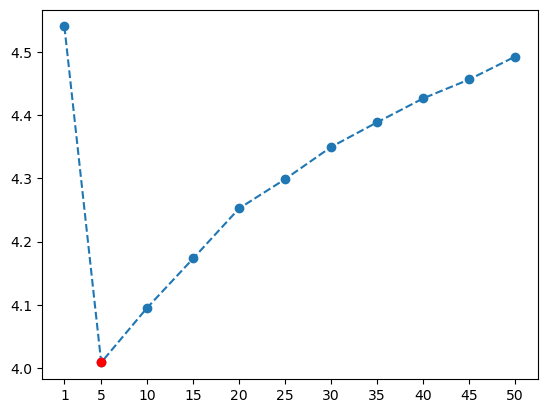

In [69]:
from sklearn.model_selection import cross_val_score
hp = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

cv_errors= np.zeros(len(hp))

for i in range(len(hp)):
    knn = KNeighborsRegressor(n_neighbors=hp[i])
    scores = cross_val_score(knn,X_train,Y_train,scoring='neg_root_mean_squared_error', cv=10,n_jobs=-1)
    cv_errors[i] = scores.mean()

plt.plot(hp,-cv_errors,'o--')
plt.plot(hp[np.argmax(cv_errors)],-max(cv_errors),'ro')
plt.xticks(ticks=hp)
plt.show()

<div dir='rtl'>
*
۸
فراپارامترهای زیر را برای الگوریتم نزدیکترین همسایه درنظر بگیرید.

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

به منظور پیدا کردن بهترین عدد برای فراپارامتر مدل، الگوریتم k-Fold Cross Validation را بکار بگیرید. تعداد پوشه‌ها را 10 در نظر بگیرید. مقدار متوسط شاخص RMSE برای حالت بهینه چقدر است؟
</div>

In [71]:
print(f"mean RMSE for Optimume state:{-max(cv_errors):.2f}")

mean RMSE for Optimume state:4.01


<div dir='rtl'>
*
۹
مدل با بهترین فراپارامتر را روی داده hw10_train.csv، آموزش دهید. سپس برای ارزیابی نهایی، از آن برای پیش‌بینی روی داده آزمایش (hw10_test.csv) استفاده کنید. مقدار شاخص RMSE روی داده آزمایش چقدر است؟
</div>

In [77]:
knn_opt = KNeighborsRegressor(n_neighbors=hp[np.argmax(cv_errors)])

knn_opt.fit(X_train,Y_train)

test = pd.read_csv('hw10_test.csv')

X_test = test.drop(columns=['PE'])
Y_test = test['PE']
test['predict']= knn_opt.predict(X_test)
print(f"RMSE: {root_mean_squared_error(Y_test,test['predict']):.1f}")

RMSE: 4.1


<div dir='rtl'>
*
۱۰
اگر تحت شرایط جدیدی، متوسط ساعتی دمای محیط 22 درجه سانتی‌گراد، فشار محیط 1010.5 سانتی‌متر جیوه، رطوبت نسبی 75 درصد و فشار گاز خروجی از توربین 68.5 سانتی‌متر جیوه باشد، از مدل نهایی استفاده کنید و برآورد انرژی الکتریکی خالص ساعتی را پیش‌بینی کنید.
</div>

In [88]:
df = pd.DataFrame([{'AT':22,'V':68.5, 'AP':1010.4, 'RH':75}])
print(f"{knn_opt.predict(df)[0]:.1f}")

441.5
